In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Baseline_RF 
* 제출결과 : 0.5469542991

In [2]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [29]:
column_number = {}
number_columns = {}
for i, column in enumerate(sample_submission_df.columns):
    column_number[column] = i
    number_columns[i] = column
    
    
def to_number(x, dic):
    return dic[x]

train_df['type_num'] = train_df['type'].apply(lambda x: to_number(x, column_number))


In [10]:
train_X = train_df.drop(columns=['type', 'type_num'], axis=1)
train_y = train_df['type_num']
test_X = test_df

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=42)

In [12]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
train_y_pred = forest.predict(X_test)

In [22]:
forest.score(X_test, y_test)

0.8761625387512917

### feature_importance

In [23]:
pi_df = pd.DataFrame(forest.feature_importances_, index= train_x.columns,columns= ['importance']).sort_values('importance',ascending = False)
pi_df.head()

,importance
psfMag_u,0.075099
modelMag_z,0.064802
psfMag_g,0.059734
fiberMag_z,0.054559
fiberMag_u,0.053977


### 예측결과에 대해
잘된예측 : 1,3,4,5,6,8,9,10,14,15,16,18  
중간예측 : 0,2,7,13  
망한예측 : 11,12,17

In [87]:
cm_result = pd.DataFrame(confusion_matrix(train_y_pred,y_test))

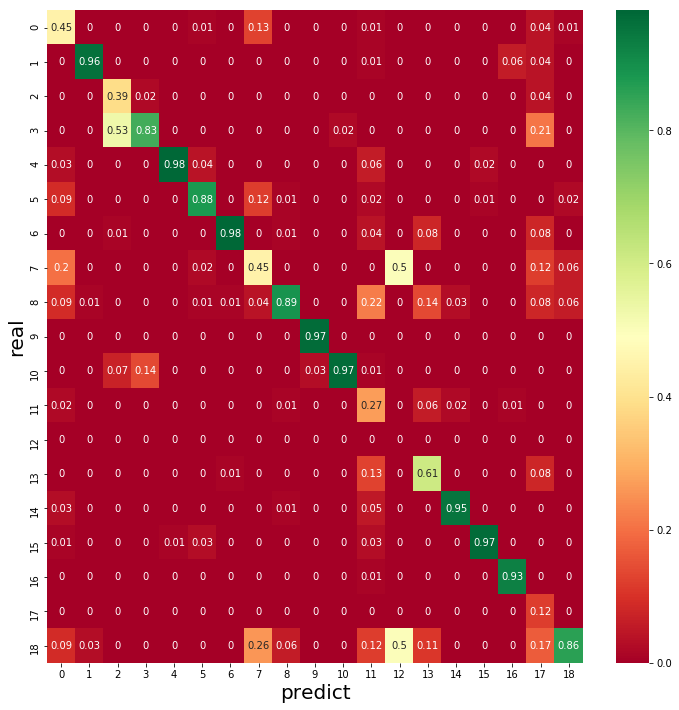

In [121]:
plt.figure(figsize =(12,12))
sns.heatmap(round(cm_result/np.sum(cm_result),2),annot = True, cmap ='RdYlGn')
plt.ylabel("real",fontsize=20)
plt.xlabel("predict",fontsize=20)
plt.show()

In [42]:
y_pred = forest.predict_proba(test_x)

In [43]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission.csv', index=True)